1/1 [==============================] - 0s 24ms/step


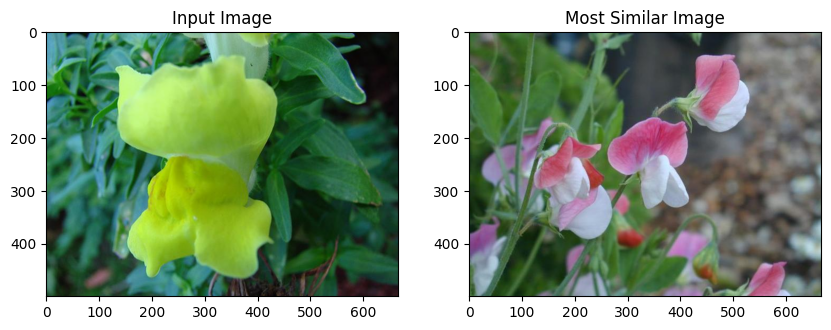

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt

# Load model and feature extraction
model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features.flatten()

# Caclulate the euclidean distance among two vectors
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

# To find the most similar image
def find_most_similar_image(input_img_features, class_folder):
    features_list = []
    for img_file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_file)
        features_list.append((img_file, extract_features(img_path)))
    # Calcola la distanza euclidea tra le caratteristiche dell'immagine di input e tutte le altre immagini della classe
    distances = [(img_file, euclidean_distance(input_img_features, features)) for img_file, features in features_list]
    most_similar_image, min_distance = min(distances, key=lambda x: x[1])
    return most_similar_image, min_distance

# Visualize the two images
def plot_images(img1_path, img2_path):
    plt.figure(figsize=(10, 5))

    # Plot dell'immagine di input
    plt.subplot(1, 2, 1)
    img1 = image.load_img(img1_path)
    plt.imshow(img1)
    plt.title('Input Image')

    # Plot dell'immagine più simile
    plt.subplot(1, 2, 2)
    img2 = image.load_img(img2_path)
    plt.imshow(img2)
    plt.title('Most Similar Image')

    plt.show()

input_img_path = '/kaggle/input/aml-flowers-dataset/test_images_by_class/test_images_by_class/11/image_03095.jpg'
class_folder = '/kaggle/input/aml-flowers-dataset/test_images_by_class/test_images_by_class/4'

input_img_features = extract_features(input_img_path)
most_similar_image, min_distance = find_most_similar_image(input_img_features, class_folder)
plot_images(input_img_path, os.path.join(class_folder, most_similar_image))